In [77]:
import pandas as pd
import numpy as np
import seaborn as sns

import warnings

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

('odometer', 0.2082950467068729)
('lat', 0.18672127488614793)
('long', 0.18662450097696767)
('year', 0.1340447120256896)
('manufacturer', 0.09996135786509319)
('size', 0.03852721862934799)
('cylinders', 0.026785944291381005)
('condition', 0.02234244217426378)
('drive', 0.02129349729558164)
('price', 0.02118579882858278)
('type', 0.020777713965165846)
('transmission', 0.015602771089974167)
('fuel', 0.01313232161847703)
('title_status', 0.004705399646454622)

In [78]:
dt = pd.read_csv('./Data/clean_vehicles.csv')[[
    'id',
    'odometer',
    'lat',
    'long',
    'year',
    'manufacturer',
    'size',
    'cylinders',
    'condition',
    # 'drive',
    # 'price',
    # 'type'
]]

In [79]:
dt

,id,odometer,lat,long,year,manufacturer,size,cylinders,condition
0,7316814884,57923.0,32.590000,-85.480000,2014.0,gmc,full-size,8 cylinders,good
1,7316814758,71229.0,32.590000,-85.480000,2010.0,chevrolet,full-size,8 cylinders,good
2,7316814989,19160.0,32.590000,-85.480000,2020.0,chevrolet,full-size,8 cylinders,good
3,7316743432,41124.0,32.590000,-85.480000,2017.0,toyota,full-size,8 cylinders,good
4,7316356412,128000.0,32.592000,-85.518900,2013.0,ford,full-size,6 cylinders,excellent
...,...,...,...,...,...,...,...,...,...
383482,7301591192,32226.0,33.786500,-84.445400,2019.0,nissan,sub-compact,6 cylinders,good
383483,7301591187,12029.0,33.786500,-84.445400,2020.0,volvo,sub-compact,4 cylinders,good
383484,7301591147,4174.0,33.779214,-84.411811,2020.0,cadillac,sub-compact,4 cylinders,good
383485,7301591140,30112.0,33.786500,-84.445400,2018.0,lexus,sub-compact,6 cylinders,good


In [80]:
scaler = MinMaxScaler()

dt['year'] = scaler.fit_transform(dt[['year']])

In [81]:
cols = [
    'manufacturer',
    'condition',
    'cylinders',
    'size',
    # 'drive',
    # 'type'
]

for i in cols:
    print(f'{i} --> {dt[i].nunique()}')

manufacturer --> 41
condition --> 6
cylinders --> 8
size --> 4


In [82]:
labeler = LabelEncoder()

for i in cols:
    dt[i] = labeler.fit_transform(dt[[i]])

In [83]:
dt.head()

,id,odometer,lat,long,year,manufacturer,size,cylinders,condition
0,7316814884,57923.0,32.590,-85.4800,0.934426,14,1,6,2
1,7316814758,71229.0,32.590,-85.4800,0.901639,7,1,6,2
2,7316814989,19160.0,32.590,-85.4800,0.983607,7,1,6,2
3,7316743432,41124.0,32.590,-85.4800,0.959016,38,1,6,2
4,7316356412,128000.0,32.592,-85.5189,0.926230,13,1,5,0


In [84]:
pca = PCA(n_components = 3)

In [85]:
dt_pca =pd.DataFrame(pca.fit_transform(dt))

In [86]:
kmeans = KMeans(n_clusters = 3, random_state = 42).fit(dt_pca)

In [87]:
dt_pca['clusters'] = kmeans.labels_

In [88]:
dt_pca.shape

(383487, 4)

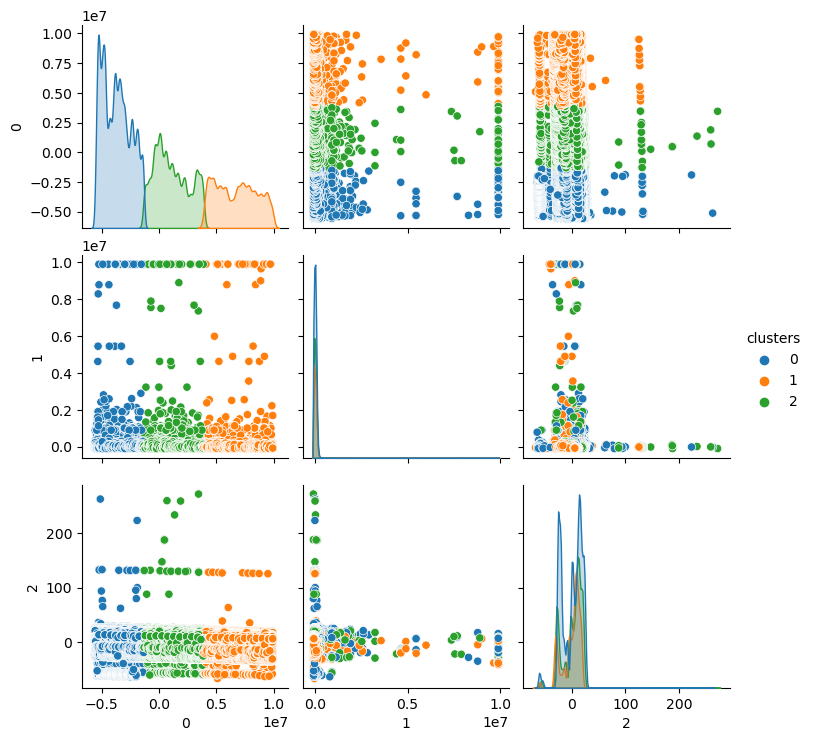

In [89]:
sns.pairplot(dt_pca, hue='clusters', palette=sns.color_palette())